Ekip:
Burcu Tokol - 19120205055
Dilara Karaduman - 19120205068
Yusuf Altundal - 19120205057

In [ ]:
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy import stats
from numpy.linalg import norm
from matplotlib.pyplot import figure
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.metrics import accuracy_score
%matplotlib inline

url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url3= ' https://drive.google.com/file/d/1bliHgeBlBOS7BX0F7KPRlrycVYcj14qG/view?usp=sharing'
url4 = 'https://drive.google.com/uc?id=' + url3.split('/')[-2]

url5='https://drive.google.com/file/d/1St_Y8kECwGmZIGgMHlVCrAX8DP6GbHwB/view?usp=sharing'
url_vaccination='https://drive.google.com/uc?id=' + url5.split('/')[-2]

df = pd.read_csv(url2021) #lokasyon datası
df2 = pd.read_csv(url4) #günlük vaka-ölüm-iyilesme vb data
df3= pd.read_csv(url_vaccination) #aşı datası

In [ ]:
x=0
y=295
df2.loc[x:y]
df2.loc[x:y].index
df2.drop(df2.loc[x:y].index, inplace=True)
df2 = df2.drop(["Açıklamalar","yatak_doluluk_orani","Unnamed: 0","eriskin_yogun_bakim_doluluk_orani",'Ağır Hasta','YBU','Entube','Gunluk_Hasta',"ventilator_doluluk_orani",'Gunluk_Test',"Toplam_Hasta","Toplam_Vefat","Toplam_Test"], axis=1)


In [ ]:
df2['Gunluk_Vefat'] = df2['Gunluk_Vefat'].fillna(0)
df2['Gunluk_iyilesen'] = df2['Gunluk_iyilesen'].fillna(0)
df2['Toplam_iyilesen'] = df2['Toplam_iyilesen'].fillna(0)

df3['total_vaccinations'] = df3['total_vaccinations'].fillna(0)




In [ ]:
df2['Tarih'] = df2['Tarih'].astype('str')
df2['Tarih'] = df2['Tarih'].str.replace('.', '')
df2['Tarih'] = pd.to_numeric(df2['Tarih'], errors='coerce')
df2['Tarih'] = df2['Tarih']/10000
df2['Tarih'] = df2['Tarih'].mod(100)
df2['Tarih'] =df2['Tarih'].astype('int')

df2['Günlük Vaka'] = df2['Günlük Vaka'].astype('str')
df2['Günlük Vaka'] = df2['Günlük Vaka'].str.replace('.', '')
df2['Günlük Vaka'] = pd.to_numeric(df2['Günlük Vaka'], errors='coerce')

df2['Gunluk_iyilesen'] = df2['Gunluk_iyilesen'].astype('str')
df2['Gunluk_iyilesen'] = df2['Gunluk_iyilesen'].str.replace('.', '')
df2['Gunluk_iyilesen'] = pd.to_numeric(df2['Gunluk_iyilesen'], errors='coerce')

df2['Toplam_iyilesen'] = df2['Toplam_iyilesen'].astype('str')
df2['Toplam_iyilesen'] = df2['Toplam_iyilesen'].str.replace('.', '')
df2['Toplam_iyilesen'] = pd.to_numeric(df2['Toplam_iyilesen'], errors='coerce')

df2['Toplam Vaka'] = df2['Toplam Vaka'].astype('str')
df2['Toplam Vaka'] = df2['Toplam Vaka'].str.replace('.', '')
df2['Toplam Vaka'] = pd.to_numeric(df2['Toplam Vaka'], errors='coerce')



df3['total_vaccinations'] = df3['total_vaccinations'].astype('str')
df3['total_vaccinations'] = df3['total_vaccinations'].str.replace('.', '')
df3['total_vaccinations'] = pd.to_numeric(df3['total_vaccinations'], errors='coerce')

df3['people_vaccinated'] = df3['people_vaccinated'].astype('str')
df3['people_vaccinated'] = df3['people_vaccinated'].str.replace('.', '')
df3['people_vaccinated'] = pd.to_numeric(df3['people_vaccinated'], errors='coerce')


df3['people_fully_vaccinated'] = df3['people_fully_vaccinated'].astype('str')
df3['people_fully_vaccinated'] = df3['people_fully_vaccinated'].str.replace('.', '')
df3['people_fully_vaccinated'] = pd.to_numeric(df3['people_fully_vaccinated'], errors='coerce')


df3['total_boosters'] = df3['total_boosters'].astype('str')
df3['total_boosters'] = df3['total_boosters'].str.replace('.', '')
df3['total_boosters'] = pd.to_numeric(df3['total_boosters'], errors='coerce')


<ipython-input-4-291dfdf5ebd8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Tarih'] = df2['Tarih'].str.replace('.', '')
<ipython-input-4-291dfdf5ebd8>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Günlük Vaka'] = df2['Günlük Vaka'].str.replace('.', '')
<ipython-input-4-291dfdf5ebd8>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Gunluk_iyilesen'] = df2['Gunluk_iyilesen'].str.replace('.', '')
<ipython-input-4-291dfdf5ebd8>:17: FutureWarning: The default value of regex will change from True to Fals

In [ ]:
count=len(df2['Toplam Vaka'])
df2['Günlük Vaka'][296] = df2['Toplam Vaka'][296]
df2['Gunluk_iyilesen'][296] = df2['Toplam_iyilesen'][296]
df2['Günlük Vaka'] = df2['Günlük Vaka'].fillna(-5)
df2['Günlük Vaka'] = df2['Günlük Vaka'].astype('int')
for i in range(296,count): 
  if (df2['Günlük Vaka'][i]==(-5)):
   df2.loc[i, 'Günlük Vaka'] = (df2['Toplam Vaka'][i]-df2['Toplam Vaka'][i-1])
   df2.loc[i, 'Gunluk_iyilesen'] = (df2['Toplam_iyilesen'][i]-df2['Toplam_iyilesen'][i-1])
  if(df2['Günlük Vaka'][i]>=(100000000)):
    df2['Günlük Vaka'][i] =df2['Günlük Vaka'][i]/1000000000000
  if(df2['Gunluk_iyilesen'][i]>=(100000000)):
     df2['Gunluk_iyilesen'][i] =df2['Gunluk_iyilesen'][i]/1000000000000



<ipython-input-5-81f97d3ca940>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Günlük Vaka'][296] = df2['Toplam Vaka'][296]
<ipython-input-5-81f97d3ca940>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Gunluk_iyilesen'][296] = df2['Toplam_iyilesen'][296]


In [ ]:
df2 =df2.drop(["Toplam Vaka"],axis = 1)

In [ ]:
pd.set_option('mode.chained_assignment', None)
df2.rename(columns={'Tarih': 'date'}, inplace=True)

ay=df2.groupby(df2['date']).mean() #aylara göre gruplama
ay = ay.rename({'Tarih':'date','Günlük Vaka':'Ort_Gunluk_Vaka','Gunluk_Hasta': 'Ort_Gunluk_hasta', 'Gunluk_Vefat': 'Ort_Gunluk_Vefat','Gunluk_iyilesen':'Ort_Gunluk_iyilesen'}, axis=1)
ay = ay.reset_index()
ay['Ort_Gunluk_Vaka'] = ay['Ort_Gunluk_Vaka'].astype('int')
ay['Ort_Gunluk_Vefat'] = ay['Ort_Gunluk_Vefat'].astype('int')
ay['Toplam_iyilesen'] = ay['Toplam_iyilesen'].astype('int')
ay['Ort_Gunluk_iyilesen'] = ay['Ort_Gunluk_iyilesen'].astype('int')
ay =ay.drop(["Toplam_iyilesen"],axis = 1)

ay

,date,Ort_Gunluk_Vaka,Ort_Gunluk_Vefat,Ort_Gunluk_iyilesen
0,1,78676,164,75810
1,2,7546,92,6657
2,3,18571,95,13933
3,4,46445,286,41960
4,5,13078,238,25182
5,6,5541,73,5732
6,7,8356,51,5004
7,8,18250,173,12350
8,9,25524,244,24386
9,10,23996,211,24901


In [ ]:
month=df.groupby(pd.DatetimeIndex(df['date']).month).mean() #aylara göre gruplama
month = month.reset_index()
month

month_vaccination=df3.groupby(pd.DatetimeIndex(df3['date']).month).mean() #aylara göre gruplama
month_vaccination = month_vaccination.reset_index()
month_vaccination

month_vaccination['total_boosters']=month_vaccination['total_boosters'].fillna(0)
month_vaccination['total_vaccinations'] = month_vaccination['total_vaccinations'].astype('int')
month_vaccination['people_vaccinated'] = month_vaccination['people_vaccinated'].astype('int')
month_vaccination['people_fully_vaccinated'] = month_vaccination['people_fully_vaccinated'].astype('int')
month_vaccination['total_boosters'] = month_vaccination['total_boosters'].astype('int')
month_vaccination

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,1,19034583,569406666,516459786,237610893
1,2,4765912,52006350,10008810,0
2,3,11892469,78768283,40156413,0
3,4,19421360,116648352,77565253,0
4,5,26234885,152053879,110294975,0
5,6,38341267,243385980,139927085,2988410
6,7,61814264,384354722,201624394,32163530
7,8,83804649,443639021,325864113,68543358
8,9,102884359,517526246,410155760,101161587
9,10,113576219,547760884,470208241,117793070


In [ ]:
dfinal = ay.merge(month, on="date", how = 'inner') #ölüm ve lokasyon datası birleştirildi
dfinal2 = dfinal.merge(month_vaccination, on="date", how='inner') #aşı datası eklendi
dfinal2

,date,Ort_Gunluk_Vaka,Ort_Gunluk_Vefat,Ort_Gunluk_iyilesen,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,1,78676,164,75810,NaN,NaN,-50.178609,-4.892954,-34.120820,-40.967841,-31.960336,13.586489,19034583,569406666,516459786,237610893
1,2,7546,92,6657,NaN,NaN,-41.179696,10.830794,-22.787913,-31.025378,-25.911408,9.778199,4765912,52006350,10008810,0
2,3,18571,95,13933,NaN,NaN,-24.850222,24.720614,-8.019031,-20.468370,-13.891509,6.377278,11892469,78768283,40156413,0
3,4,46445,286,41960,NaN,NaN,-35.502006,21.478576,-13.863790,-27.611852,-23.792819,11.048254,19421360,116648352,77565253,0
4,5,13078,238,25182,NaN,NaN,-41.302671,13.629981,-11.967062,-31.783479,-33.632010,12.395152,26234885,152053879,110294975,0
5,6,5541,73,5732,NaN,NaN,1.851735,47.980315,39.925513,8.431063,-10.437586,0.311459,38341267,243385980,139927085,2988410
6,7,8356,51,5004,NaN,NaN,26.966805,61.709726,86.983643,40.417973,-17.413158,-2.827990,61814264,384354722,201624394,32163530
7,8,18250,173,12350,NaN,NaN,26.708902,58.990142,73.931242,34.897984,-8.252919,-2.106539,83804649,443639021,325864113,68543358
8,9,25524,244,24386,NaN,NaN,24.913273,62.677302,52.151012,25.758633,-0.748786,-1.655904,102884359,517526246,410155760,101161587
9,10,23996,211,24901,NaN,NaN,22.915181,61.064338,41.555628,22.198843,1.826553,-0.911099,113576219,547760884,470208241,117793070


In [ ]:
length=len(dfinal2['date'])
dfinal2['out_of_home_area']=0.00 #dış mekanlar bir değişkende toplandı
for i in range(0,length):
    dfinal2['out_of_home_area'][i] = dfinal2['retail_and_recreation_percent_change_from_baseline'][i] + dfinal2['grocery_and_pharmacy_percent_change_from_baseline'][i] + dfinal2['parks_percent_change_from_baseline'][i] +dfinal2['transit_stations_percent_change_from_baseline'][i]
    + dfinal2['workplaces_percent_change_from_baseline']

In [ ]:
dfinal2 =dfinal2.drop(["metro_area","census_fips_code","retail_and_recreation_percent_change_from_baseline","grocery_and_pharmacy_percent_change_from_baseline","parks_percent_change_from_baseline","transit_stations_percent_change_from_baseline","workplaces_percent_change_from_baseline"],axis = 1)
dfinal2

,date,Ort_Gunluk_Vaka,Ort_Gunluk_Vefat,Ort_Gunluk_iyilesen,residential_percent_change_from_baseline,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,out_of_home_area
0,1,78676,164,75810,13.586489,19034583,569406666,516459786,237610893,-130.160224
1,2,7546,92,6657,9.778199,4765912,52006350,10008810,0,-84.162193
2,3,18571,95,13933,6.377278,11892469,78768283,40156413,0,-28.617009
3,4,46445,286,41960,11.048254,19421360,116648352,77565253,0,-55.499071
4,5,13078,238,25182,12.395152,26234885,152053879,110294975,0,-71.423231
5,6,5541,73,5732,0.311459,38341267,243385980,139927085,2988410,98.188626
6,7,8356,51,5004,-2.827990,61814264,384354722,201624394,32163530,216.078146
7,8,18250,173,12350,-2.106539,83804649,443639021,325864113,68543358,194.528269
8,9,25524,244,24386,-1.655904,102884359,517526246,410155760,101161587,165.500221
9,10,23996,211,24901,-0.911099,113576219,547760884,470208241,117793070,147.733991


In [ ]:
dfinal2['ratio_gunluk_vaka']=0.00 #bir önceki güne göre artış oranı hesaplandı
dfinal2['ratio_gunluk_vefat']=0.00
dfinal2['ratio_gunluk_iyilesen']=0.00
dfinal2['ratio_gunluk_asi']=0.00
for i in range(1,length):
 dfinal2['ratio_gunluk_vaka'][i] = ((dfinal2['Ort_Gunluk_Vaka'][i]-dfinal2['Ort_Gunluk_Vaka'][i-1])/dfinal2['Ort_Gunluk_Vaka'][i-1])*100
 dfinal2['ratio_gunluk_vefat'][i] = ((dfinal2['Ort_Gunluk_Vefat'][i]-dfinal2['Ort_Gunluk_Vefat'][i-1])/dfinal2['Ort_Gunluk_Vefat'][i-1])*100
 dfinal2['ratio_gunluk_iyilesen'][i] = ((dfinal2['Ort_Gunluk_iyilesen'][i]-dfinal2['Ort_Gunluk_iyilesen'][i-1])/dfinal2['Ort_Gunluk_iyilesen'][i-1])*100
 dfinal2['ratio_gunluk_asi'][i] = ((dfinal2['total_vaccinations'][i]-dfinal2['total_vaccinations'][i-1])/dfinal2['total_vaccinations'][i-1])*100
dfinal2

,date,Ort_Gunluk_Vaka,Ort_Gunluk_Vefat,Ort_Gunluk_iyilesen,residential_percent_change_from_baseline,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,out_of_home_area,ratio_gunluk_vaka,ratio_gunluk_vefat,ratio_gunluk_iyilesen,ratio_gunluk_asi
0,1,78676,164,75810,13.586489,19034583,569406666,516459786,237610893,-130.160224,0.000000,0.000000,0.000000,0.000000
1,2,7546,92,6657,9.778199,4765912,52006350,10008810,0,-84.162193,-90.408765,-43.902439,-91.218837,-74.961826
2,3,18571,95,13933,6.377278,11892469,78768283,40156413,0,-28.617009,146.103896,3.260870,109.298483,149.531863
3,4,46445,286,41960,11.048254,19421360,116648352,77565253,0,-55.499071,150.094233,201.052632,201.155530,63.308057
4,5,13078,238,25182,12.395152,26234885,152053879,110294975,0,-71.423231,-71.841964,-16.783217,-39.985701,35.082636
5,6,5541,73,5732,0.311459,38341267,243385980,139927085,2988410,98.188626,-57.631136,-69.327731,-77.237709,46.146122
6,7,8356,51,5004,-2.827990,61814264,384354722,201624394,32163530,216.078146,50.803104,-30.136986,-12.700628,61.221235
7,8,18250,173,12350,-2.106539,83804649,443639021,325864113,68543358,194.528269,118.405936,239.215686,146.802558,35.574936
8,9,25524,244,24386,-1.655904,102884359,517526246,410155760,101161587,165.500221,39.857534,41.040462,97.457490,22.766887
9,10,23996,211,24901,-0.911099,113576219,547760884,470208241,117793070,147.733991,-5.986522,-13.524590,2.111867,10.392114


In [ ]:
dfinal2['change_ratio_gunluk_vaka']=0 #oranların artışı veya azalışı bool olarak ifade edildi
dfinal2['change_ratio_gunluk_vefat']=0
dfinal2['change_ratio_gunluk_iyilesen']=0
dfinal2['change_residential_percent_change_from_baseline']=0
dfinal2['change_out_of_home_area']=0
count=len(dfinal2['date'])
for i in range(1,count):
    if dfinal2['ratio_gunluk_vaka'][i]>0:
        dfinal2['change_ratio_gunluk_vaka'][i]=1
    elif dfinal2['ratio_gunluk_vaka'][i]<=0:
        dfinal2['change_ratio_gunluk_vaka'][i]=0

    if dfinal2['ratio_gunluk_vefat'][i]>0:
        dfinal2['change_ratio_gunluk_vefat'][i]=1
    elif dfinal2['ratio_gunluk_vefat'][i]<=0:
        dfinal2['change_ratio_gunluk_vefat'][i]=0

    if dfinal2['ratio_gunluk_iyilesen'][i]>0:
        dfinal2['change_ratio_gunluk_iyilesen'][i]=1
    elif dfinal2['ratio_gunluk_iyilesen'][i]<=0:
        dfinal2['change_ratio_gunluk_iyilesen'][i]=0

    if dfinal2['residential_percent_change_from_baseline'][i]>0:
        dfinal2['change_residential_percent_change_from_baseline'][i]=1
    elif dfinal2['residential_percent_change_from_baseline'][i]<=0:
        dfinal2['change_residential_percent_change_from_baseline'][i]=0
        
    if dfinal2['out_of_home_area'][i]>0:
        dfinal2['change_out_of_home_area'][i]=1
    elif dfinal2['out_of_home_area'][i]<=0:
        dfinal2['change_out_of_home_area'][i]=0


dfinal2

,date,Ort_Gunluk_Vaka,Ort_Gunluk_Vefat,Ort_Gunluk_iyilesen,residential_percent_change_from_baseline,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,out_of_home_area,ratio_gunluk_vaka,ratio_gunluk_vefat,ratio_gunluk_iyilesen,ratio_gunluk_asi,change_ratio_gunluk_vaka,change_ratio_gunluk_vefat,change_ratio_gunluk_iyilesen,change_residential_percent_change_from_baseline,change_out_of_home_area
0,1,78676,164,75810,13.586489,19034583,569406666,516459786,237610893,-130.160224,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
1,2,7546,92,6657,9.778199,4765912,52006350,10008810,0,-84.162193,-90.408765,-43.902439,-91.218837,-74.961826,0,0,0,1,0
2,3,18571,95,13933,6.377278,11892469,78768283,40156413,0,-28.617009,146.103896,3.260870,109.298483,149.531863,1,1,1,1,0
3,4,46445,286,41960,11.048254,19421360,116648352,77565253,0,-55.499071,150.094233,201.052632,201.155530,63.308057,1,1,1,1,0
4,5,13078,238,25182,12.395152,26234885,152053879,110294975,0,-71.423231,-71.841964,-16.783217,-39.985701,35.082636,0,0,0,1,0
5,6,5541,73,5732,0.311459,38341267,243385980,139927085,2988410,98.188626,-57.631136,-69.327731,-77.237709,46.146122,0,0,0,1,1
6,7,8356,51,5004,-2.827990,61814264,384354722,201624394,32163530,216.078146,50.803104,-30.136986,-12.700628,61.221235,1,0,0,0,1
7,8,18250,173,12350,-2.106539,83804649,443639021,325864113,68543358,194.528269,118.405936,239.215686,146.802558,35.574936,1,1,1,0,1
8,9,25524,244,24386,-1.655904,102884359,517526246,410155760,101161587,165.500221,39.857534,41.040462,97.457490,22.766887,1,1,1,0,1
9,10,23996,211,24901,-0.911099,113576219,547760884,470208241,117793070,147.733991,-5.986522,-13.524590,2.111867,10.392114,0,0,1,0,1


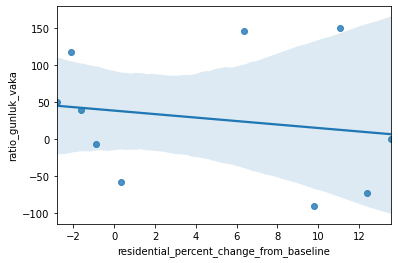

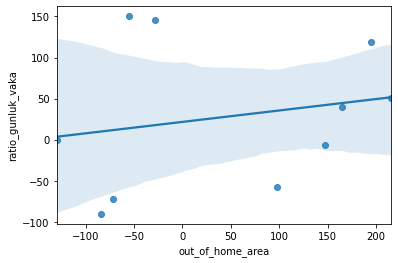

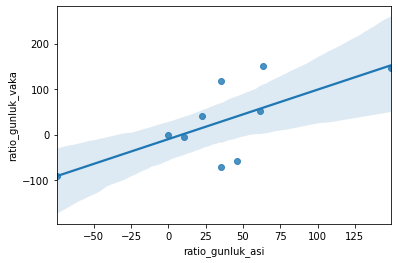

In [ ]:
sns.regplot(x=dfinal2["residential_percent_change_from_baseline"], y=dfinal2["ratio_gunluk_vaka"]) #evde kalma oranı ile vaka oranı karşılaştırması
plt.show()

sns.regplot(x=dfinal2["out_of_home_area"], y=dfinal2["ratio_gunluk_vaka"]) #dış mekan oranları ile vaka oranı karşılaştırması
plt.show()

sns.regplot(x=dfinal2["ratio_gunluk_asi"], y=dfinal2["ratio_gunluk_vaka"]) #dış mekan oranları ile vaka oranı karşılaştırması
plt.show()

In [ ]:
dfinal2=dfinal2.astype(int)
decTree=dfinal2[['out_of_home_area','residential_percent_change_from_baseline','ratio_gunluk_asi','change_ratio_gunluk_vaka']]

In [ ]:
decTree #agacta kullanılmak icin df olusturuldu

,out_of_home_area,residential_percent_change_from_baseline,ratio_gunluk_asi,change_ratio_gunluk_vaka
0,-130,13,0,0
1,-84,9,-74,0
2,-28,6,149,1
3,-55,11,63,1
4,-71,12,35,0
5,98,0,46,0
6,216,-2,61,1
7,194,-2,35,1
8,165,-1,22,1
9,147,0,10,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

X = decTree[['out_of_home_area','residential_percent_change_from_baseline','ratio_gunluk_asi']] #inputlar
y = decTree[['change_ratio_gunluk_vaka']] #output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) #test ve egitim datası olusturuldu

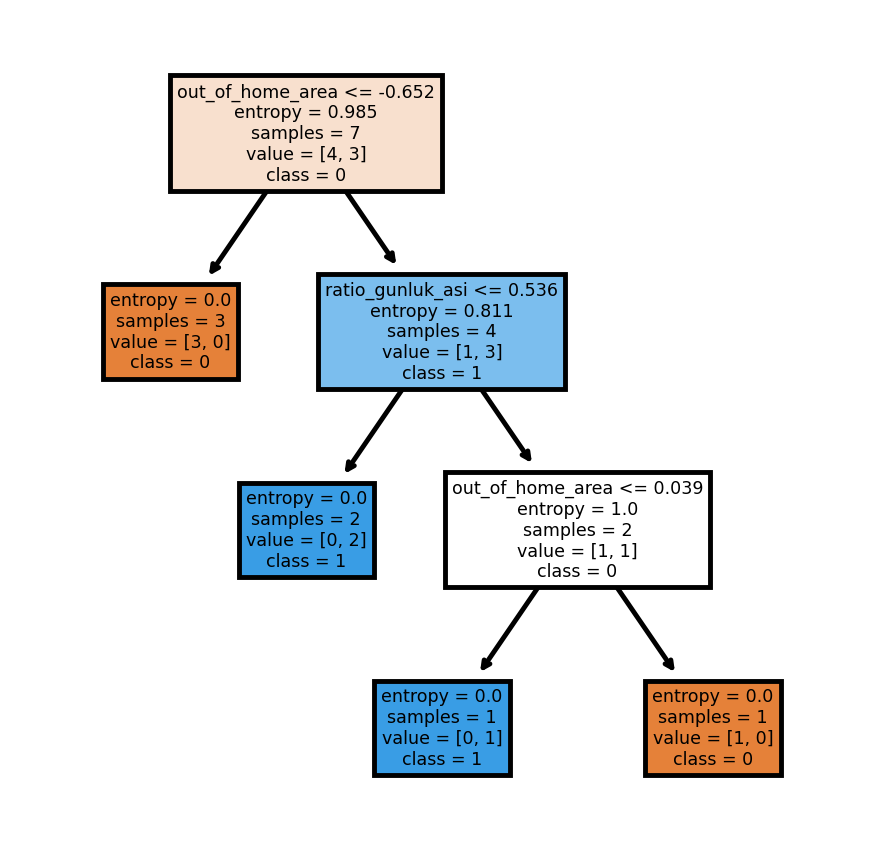

Accuracy: 0.3333333333333333


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0) #entropi'ye göre agac olusturuldu

clf.fit(X_train, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=350)
tree.plot_tree(clf,
               feature_names = decTree.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()


y_pred = clf.predict(X_test) #egitim datasına göre test datasının dogrulugu hesaplandı
print("Accuracy:",accuracy_score(y_test, y_pred))

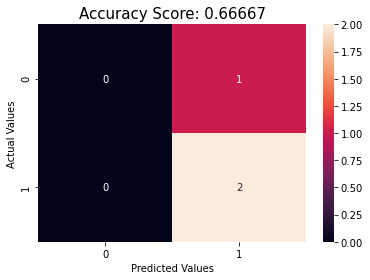

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)
rf = RandomForestClassifier(n_estimators=100, max_depth = 8, random_state=42)
rf.fit(X_train, y_train.values.ravel())

predictions = rf.predict(X_test)
score = round(accuracy_score(y_test, predictions), 5)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()


In [ ]:
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import tree

d_tree99 = rf.estimators_[99]
dot_data1 = StringIO()
export_graphviz(d_tree99, feature_names = X.columns,
               out_file = dot_data1, filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())
graph.write_png('rf_5b.png')
Image(value = graph.create_png())



Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01%\x00\x00\x00\xdc\x08\x06\x00\x00\x006\x8d\xb7\x1…

              precision    recall  f1-score   support

       <=50K       0.00      0.00      0.00         1
        >50K       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\90542\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


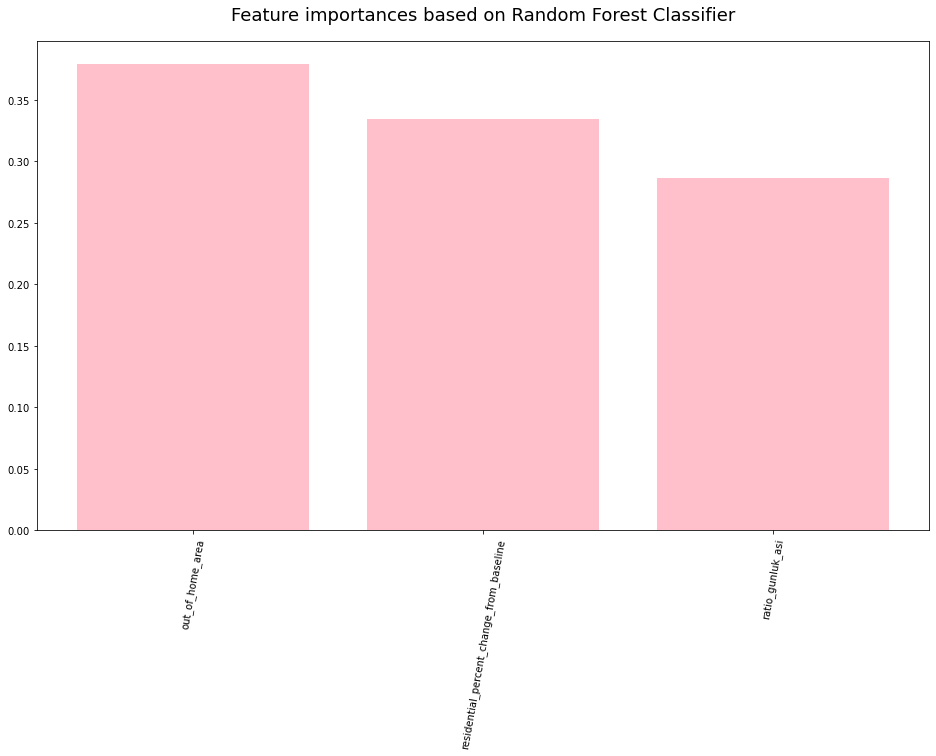

In [ ]:
from sklearn.metrics import classification_report


rf = RandomForestClassifier(n_estimators=100, max_depth = 8, random_state=42)
rf.fit(X_train, y_train.values.ravel())
predictions = rf.predict(X_test)

print(classification_report(y_test, predictions, target_names=['<=50K', '>50K']))
plt.figure(figsize=(16, 9))

ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.title("Feature importances based on Random Forest Classifier", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="pink", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()